### Basics Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

df = pd.read_csv("data/analysis.csv")


In [4]:
print(f"Num or rows {df.shape[0]}")
print(f"Num columns {df.shape[1]} with columns {list(df.columns)}")
df.head()

Num or rows 20000
Num columns 33 with columns ['day', 'device', 'domain', 'utm_campaign', 'utm_content', 'utm_medium', 'utm_source', 'utm_term', 'country', 'oeid', 'auction_start', 'auction_end', 'auction_ttl', 'auction_id', 'ad_unit_code', 'bidder', 'bidder_cpm', 'bidder_start', 'bidder_end', 'bidder_ttl', 'bidder_is_after_timeout', 'bidder_media_type', 'bidder_width', 'bidder_height', 'bidder_source', 'bidder_status', 'bidder_deal_id', 'consent', 'advertisers', 'subdomain', 'is_impression', 'refreshed', 'os']


,day,device,domain,utm_campaign,utm_content,utm_medium,utm_source,utm_term,country,oeid,...,bidder_height,bidder_source,bidder_status,bidder_deal_id,consent,advertisers,subdomain,is_impression,refreshed,os
0,2023-12-14,mobile,iefimerida.gr,NaN,NaN,NaN,NaN,NaN,GR,d3e2a605-7215-4e0e-9db8-e0b070d92074,...,0,client,noBid,bidder_deal_id0,False,advertisers0,NaN,False,False,Android
1,2023-12-14,mobile,aek365.org,NaN,NaN,NaN,NaN,NaN,GR,428cd39c-2a48-49ae-b065-d26b41deebe5,...,0,client,noBid,bidder_deal_id0,False,advertisers0,NaN,False,False,Android
2,2023-12-14,mobile,zinapost.gr,NaN,NaN,NaN,NaN,NaN,GR,6c004d96-4027-4a55-9bfc-e304c6f8f63e,...,0,client,noBid,bidder_deal_id0,True,advertisers0,NaN,False,False,Android
3,2023-12-14,mobile,govastileto.gr,NaN,NaN,NaN,NaN,NaN,GR,42a81cc6-4de2-4585-a024-5b9947ec9e52,...,0,client,noBid,bidder_deal_id0,True,advertisers0,NaN,False,False,Android
4,2023-12-14,desktop,greek-movies.com,NaN,NaN,NaN,NaN,NaN,GR,e48698c2-005d-4286-ad61-7b06c8ba0a45,...,0,client,timeout,bidder_deal_id0,False,advertisers0,NaN,False,False,Windows


## Some *Explorations*

In [7]:
domain_value_counts = df['domain'].value_counts()
domain_value_counts

domain
sdna.gr                   1659
argiro.gr                 1262
iefimerida.gr              869
enikos.gr                  559
aek365.org                 546
                          ... 
apexsports.gr                1
navaldefence.gr              1
triviaquestionsnow.com       1
greece-is.com                1
mypet.gr                     1
Name: count, Length: 231, dtype: int64

C:\Users\yvariozidis\AppData\Local\Temp\ipykernel_16556\825057555.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='visits', y='domain', data=site_counts, palette='viridis')


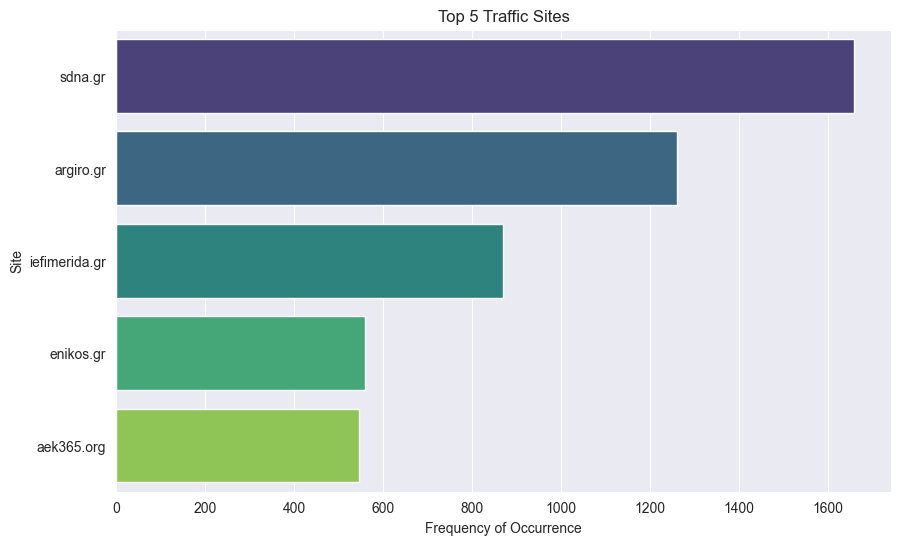

In [36]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each site in the dataset
site_counts = df['domain'].value_counts().reset_index().head(5)
site_counts.columns = ['domain', 'visits']

# Plotting the top 5 traffic sites
plt.figure(figsize=(10, 6))
sns.barplot(x='visits', y='domain', data=site_counts, palette='viridis')
plt.xlabel('Frequency of Occurrence')
plt.ylabel('Site')
plt.title('Top 5 Traffic Sites')
plt.show()


sdna.gr leads the pack with the highest visit count, showcasing its prominence among the top traffic sites in the dataset. These findings highlight the varying levels of engagement across different sites, providing insights into their respective audience reach and popularity.

In [12]:
# Group by 'country' and 'domain', then count the number of visits
visits_per_country_domain = df.groupby(['country', 'domain']).size().reset_index(name='visits')

# Find the top 5 visited sites overall
top_5_sites = visits_per_country_domain.groupby('domain')['visits'].sum().nlargest(5)

# Filter the data for the top 5 sites
top_5_sites_data = visits_per_country_domain[visits_per_country_domain['domain'].isin(top_5_sites.index.tolist())]

# Group by 'country' and sum the visits for each site
visits_per_country_top_5_sites = top_5_sites_data.groupby('country')['visits'].sum()

# Get the top 5 countries that visited the top 5 sites the most
top_5_countries_visited_top_5_sites = visits_per_country_top_5_sites.nlargest(5)

print("Top 5 countries that visited the top 5 sites the most:")
print(top_5_countries_visited_top_5_sites)

print("\nTop 5 visited sites overall:")
print(top_5_sites)

Top 5 countries that visited the top 5 sites the most:
country
GR    4502
DE      91
CY      67
GB      48
US      47
Name: visits, dtype: int64

Top 5 visited sites overall:
domain
sdna.gr          1659
argiro.gr        1262
iefimerida.gr     869
enikos.gr         559
aek365.org        546
Name: visits, dtype: int64


In [5]:
# Group by 'domain' and 'country', then count the number of visits
visits_per_domain_country = df.groupby(['domain', 'country']).size().reset_index(name='visits')

# Find the top 5 visited sites overall
top_5_sites = visits_per_domain_country.groupby('domain')['visits'].sum().nlargest(5)

# Filter the data for the top 5 sites
top_5_sites_data = visits_per_domain_country[visits_per_domain_country['domain'].isin(top_5_sites.index.tolist())]

# Define a function to get the top 5 countries for each site
def top_5_countries_per_site(group):
    return group.nlargest(5, 'visits')

# Get the top 5 countries for each of the top 5 sites
top_5_countries_per_site = top_5_sites_data.groupby('domain', group_keys=False).apply(top_5_countries_per_site)

print("Top 5 countries for each of the top 5 visited sites:")
print(top_5_countries_per_site)

Top 5 countries for each of the top 5 visited sites:
            domain country  visits
16      aek365.org      GR     488
13      aek365.org      DE      13
11      aek365.org      CH       9
12      aek365.org      CY       8
15      aek365.org      GB       7
81       argiro.gr      GR    1140
78       argiro.gr      DE      35
77       argiro.gr      CY      32
76       argiro.gr      BE      26
82       argiro.gr      US      22
193      enikos.gr      GR     525
190      enikos.gr      CY      13
192      enikos.gr      GB       7
194      enikos.gr      SE       5
195      enikos.gr      US       4
296  iefimerida.gr      GR     813
302  iefimerida.gr      US      10
293  iefimerida.gr      DE       8
295  iefimerida.gr      GB       7
287  iefimerida.gr      BE       6
630        sdna.gr      GR    1536
626        sdna.gr      DE      33
629        sdna.gr      GB      27
624        sdna.gr      CY       9
617        sdna.gr      AE       5


C:\Users\yvariozidis\AppData\Local\Temp\ipykernel_16556\1679636888.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_countries_per_site = top_5_sites_data.groupby('domain', group_keys=False).apply(top_5_countries_per_site)


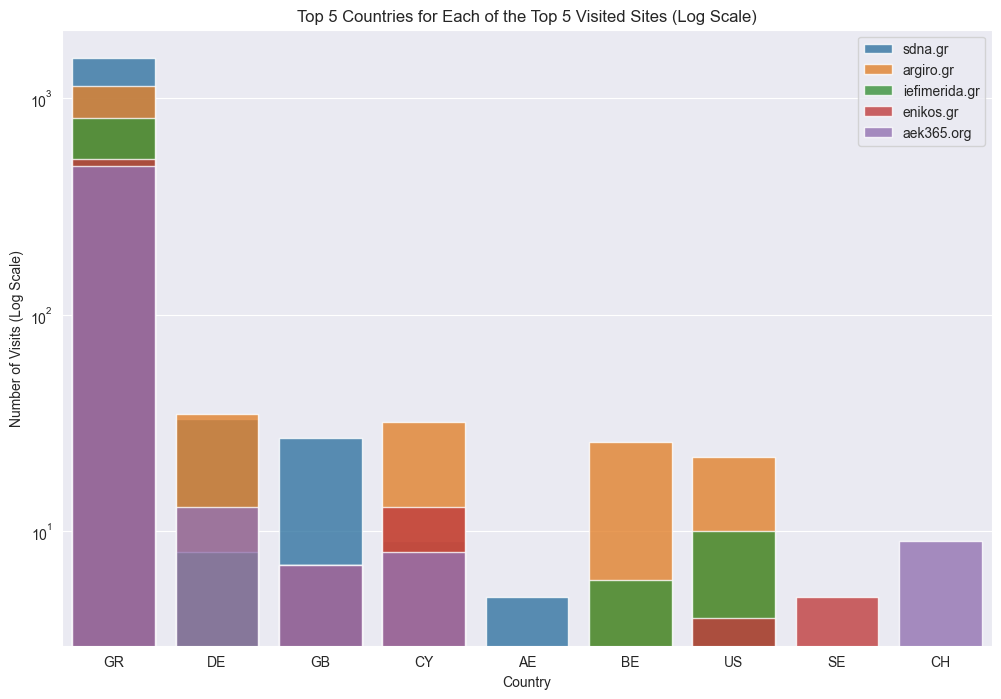

In [38]:

plt.figure(figsize=(12, 8))
site_data_lst = []

# Iterate over the top 5 sites
for i, site in enumerate(top_5_sites.index):
    # Filter the data for the current site
    site_data = top_5_countries_per_site[top_5_countries_per_site['domain'] == site]
    site_data_lst.append(site_data)
    # Plot the top 5 countries for the current site
    sns.barplot(x='country', y='visits', data=site_data, label=site, alpha=0.8)

# Set the labels and title
plt.xlabel('Country')
plt.ylabel('Number of Visits (Log Scale)')
plt.title('Top 5 Countries for Each of the Top 5 Visited Sites (Log Scale)')
plt.yscale('log')  # Set y-axis to log scale
plt.legend()

plt.show()

 - sdna.gr: Greece (GR) dominates with 1536 visits, followed by Germany (DE), Great Britain (GB), Cyprus (CY), and the United Arab Emirates (AE), albeit with fewer visits.

 - argiro.gr: Greece (GR) leads with 1140 visits, followed by Germany (DE), Cyprus (CY), Belgium (BE), and the United States (US).

 - iefimerida.gr: Greece (GR) maintains a strong presence with 813 visits, with additional contributions from the United States (US), Germany (DE), Great Britain (GB), and Belgium (BE).

 - enikos.gr: Greece (GR) remains prominent with 525 visits, accompanied by visits from Cyprus (CY), Great Britain (GB), Sweden (SE), and the United States (US).

 - aek365.org: Greece (GR) sees 488 visits, along with visits from Germany (DE), Switzerland (CH), Cyprus (CY), and Great Britain (GB).

Overall, these findings highlight strong local engagement across the sites, with varying degrees of international interest. Understanding these visit patterns can guide targeted marketing efforts and content strategies to enhance site engagement and reach.

C:\Users\yvariozidis\AppData\Local\Temp\ipykernel_16556\3330950763.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_devices_per_site = top_5_sites_data.groupby('domain', group_keys=False).apply(top_5_devices_per_site)


Top 5 devices for each of the top 5 visited sites:
            domain   device  visits
7       aek365.org   mobile     443
6       aek365.org  desktop     102
8       aek365.org   tablet       1
28       argiro.gr   mobile    1174
27       argiro.gr  desktop      79
29       argiro.gr   tablet       9
105      enikos.gr   mobile     486
104      enikos.gr  desktop      70
106      enikos.gr   tablet       3
162  iefimerida.gr   mobile     660
161  iefimerida.gr  desktop     193
163  iefimerida.gr   tablet      16
333        sdna.gr   mobile    1276
332        sdna.gr  desktop     376
334        sdna.gr   tablet       7


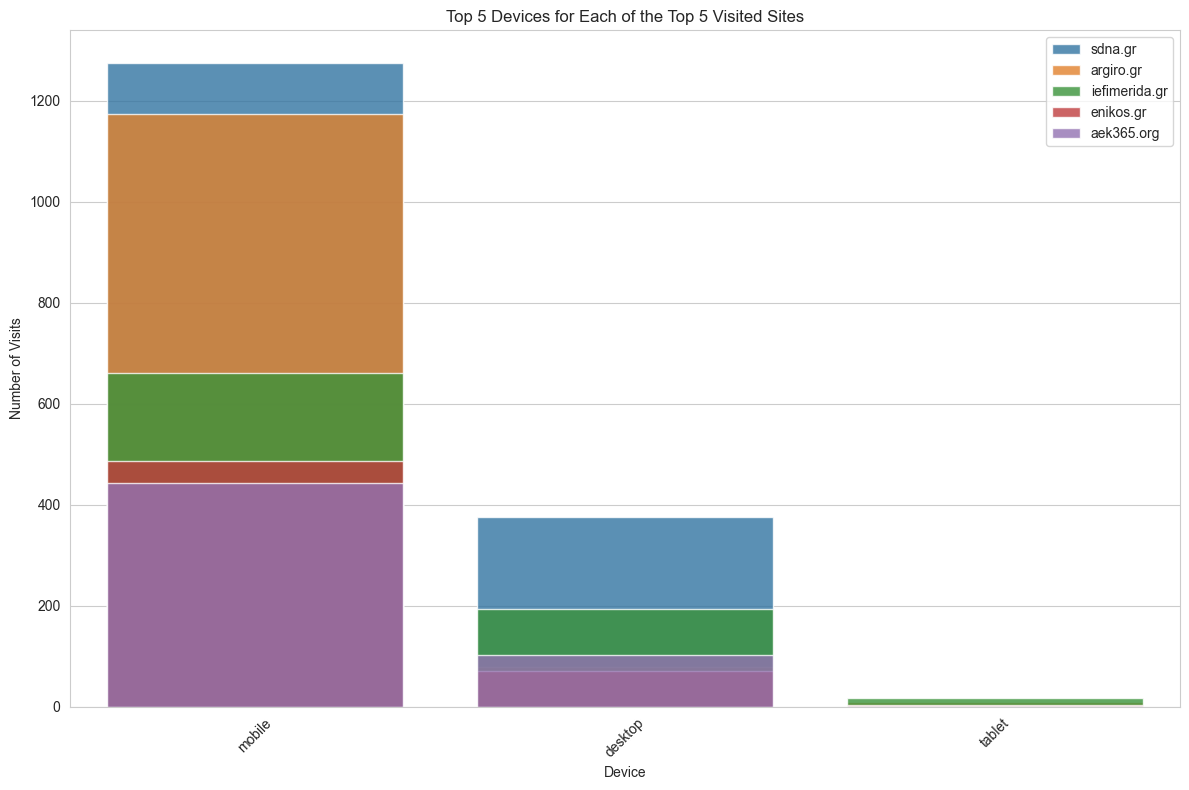

In [11]:

visits_per_domain_device = df.groupby(['domain', 'device']).size().reset_index(name='visits')

# Find the top 5 visited sites overall
top_5_sites = visits_per_domain_device.groupby('domain')['visits'].sum().nlargest(5)

# Filter the data for the top 5 sites
top_5_sites_data = visits_per_domain_device[visits_per_domain_device['domain'].isin(top_5_sites.index.tolist())]

# Define a function to get the top 5 devices for each site
def top_5_devices_per_site(group):
    return group.nlargest(5, 'visits')

# Get the top 5 devices for each of the top 5 sites
top_5_devices_per_site = top_5_sites_data.groupby('domain', group_keys=False).apply(top_5_devices_per_site)

print("Top 5 devices for each of the top 5 visited sites:")
print(top_5_devices_per_site)

plt.figure(figsize=(12, 8))

# Iterate over the top 5 sites
for i, site in enumerate(top_5_sites.index):
    # Filter the data for the current site
    site_data = top_5_devices_per_site[top_5_devices_per_site['domain'] == site]
    
    # Plot the top 5 devices for the current site
    sns.barplot(x='device', y='visits', data=site_data, label=site, alpha=0.8)

# Set the labels and title
plt.xlabel('Device')
plt.ylabel('Number of Visits')
plt.title('Top 5 Devices for Each of the Top 5 Visited Sites')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

The data reveals a consistent trend across the top 5 visited sites: mobile devices dominate access, surpassing desktop and tablet usage by a significant margin. This underscores the necessity of mobile-friendly website design. However, variations exist among sites, suggesting diverse user demographics or content preferences. Responsive design is crucial to accommodate this diversity and optimize user experience.

In [21]:
# Filter the data for the top 5 visited sites
top_5_sites_data = df[df['domain'].isin(top_5_sites.index.tolist())]

# Group by 'domain' and 'Bidder', then count the number of bids
bids_per_site_bidder = top_5_sites_data.groupby(['domain', 'bidder']).size().reset_index(name='num_bids')

# Define a function to get the top 5 bidders for each site
def top_5_bidders_per_site(group):
    return group.nlargest(5, 'num_bids')

# Get the top 5 bidders for each site
top_5_bidders_per_site = bids_per_site_bidder.groupby('domain', group_keys=False).apply(top_5_bidders_per_site)

print("Top 5 bidders in top 5 visited sites:")
print(top_5_bidders_per_site)

Top 5 bidders in top 5 visited sites:
           domain    bidder  num_bids
1      aek365.org   bidder1        83
11     aek365.org   bidder8        61
10     aek365.org   bidder7        59
9      aek365.org   bidder6        57
0      aek365.org   bidder0        46
22      argiro.gr   bidder6       162
14      argiro.gr   bidder1       161
13      argiro.gr   bidder0       159
25      argiro.gr   bidder9       145
23      argiro.gr   bidder7       134
26      enikos.gr   bidder0        80
28      enikos.gr  bidder10        71
34      enikos.gr   bidder5        68
27      enikos.gr   bidder1        63
33      enikos.gr   bidder4        51
39  iefimerida.gr   bidder1       127
47  iefimerida.gr   bidder5       107
38  iefimerida.gr   bidder0        95
40  iefimerida.gr  bidder10        94
49  iefimerida.gr   bidder8        80
52        sdna.gr   bidder1       236
60        sdna.gr   bidder5       230
59        sdna.gr   bidder4       167
61        sdna.gr   bidder6       156
51        sd

C:\Users\yvariozidis\AppData\Local\Temp\ipykernel_16556\955596974.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_bidders_per_site = bids_per_site_bidder.groupby('domain', group_keys=False).apply(top_5_bidders_per_site)


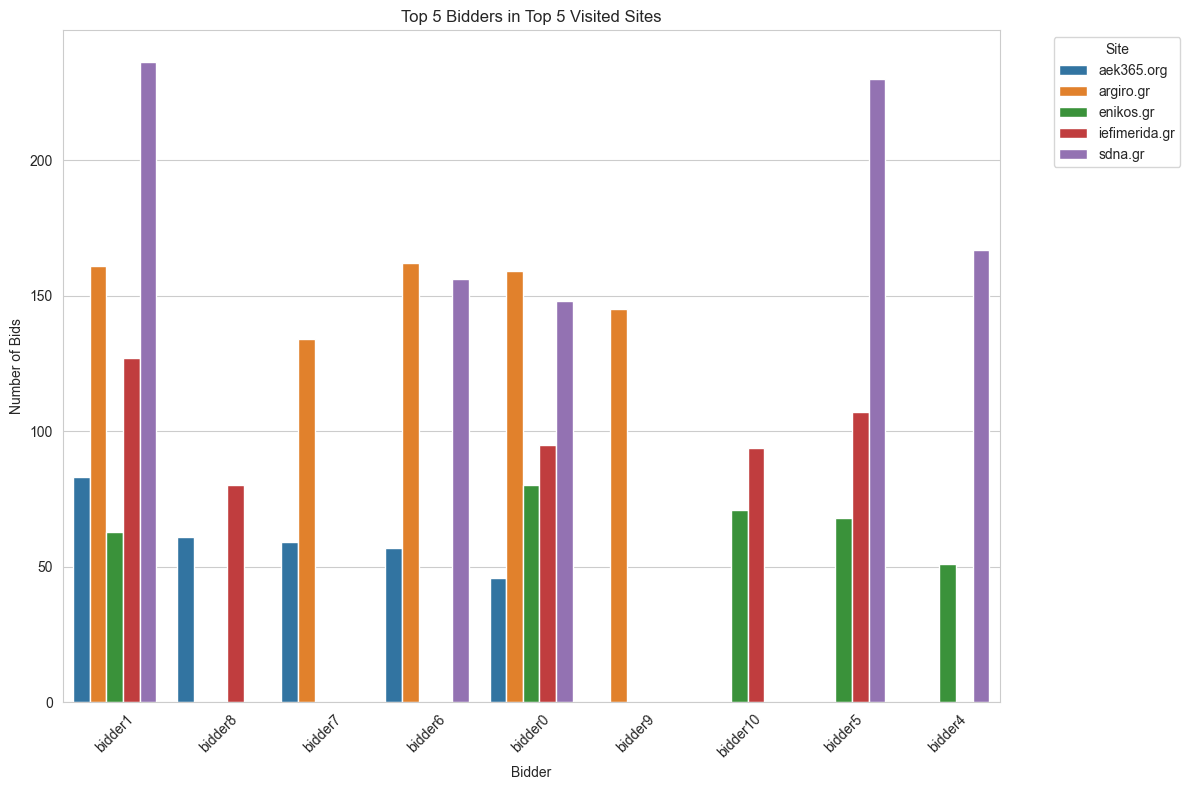

In [23]:
plt.figure(figsize=(12, 8))

# Plot the top 5 bidders for each site
sns.barplot(x='bidder', y='num_bids', hue='domain', data=top_5_bidders_per_site)

# Set the labels and title
plt.xlabel('Bidder')
plt.ylabel('Number of Bids')
plt.title('Top 5 Bidders in Top 5 Visited Sites')
plt.legend(title='Site', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

 - aek365.org: Bidder1 leads with 83 bids, closely followed by bidder8 (61), bidder7 (59), and bidder6 (57), reflecting intense competition among advertisers for ad placements.

 - argiro.gr: Bidder6 dominates with 162 bids, closely trailed by bidder1 (161) and bidder0 (159), indicating robust engagement and competitiveness in ad auctions.

 - enikos.gr: Bidder0 secures the top position with 80 bids, followed by bidder10 (71) and bidder5 (68), showcasing diverse advertiser participation and competition for visibility.

 - iefimerida.gr: Bidder1 leads with 127 bids, followed by bidder5 (107), bidder0 (95), and bidder10 (94), illustrating active advertiser engagement and competition for ad space.

 - sdna.gr: Bidder1 emerges as the dominant player with 236 bids, closely followed by bidder5 (230) and bidder4 (167), highlighting fierce competition among advertisers for prominence on this high-traffic site.

Overall, the data underscores the competitive nature of online advertising, with top bidders strategically vying for prominence on popular websites to maximize brand exposure and engagement.

C:\Users\yvariozidis\AppData\Local\Temp\ipykernel_16556\823122678.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")


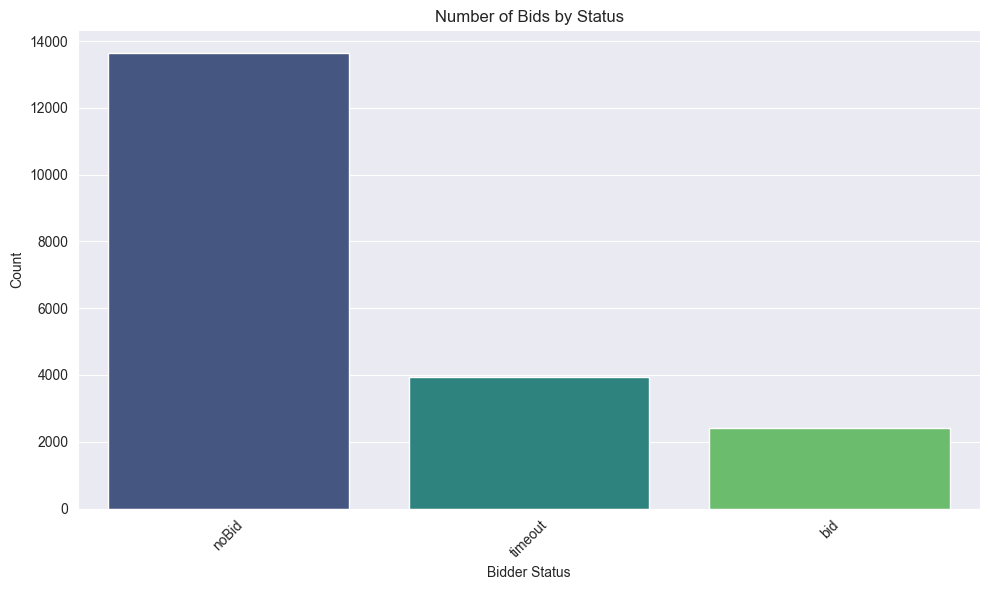

In [27]:
status_counts = df['bidder_status'].value_counts()

# Initialize the figure
plt.figure(figsize=(10, 6))

# Plot the bar plot
sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")

# Set the labels and title
plt.xlabel('Bidder Status')
plt.ylabel('Count')
plt.title('Number of Bids by Status')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Approximately 14,000 bids result in a 'noBid' status, indicating instances where bidders did not submit any bids during the auction process.
- Around 4,000 bids end with a 'timeout' status, indicating bids that were submitted but not processed within the allotted time frame.
- Approximately 3,000 bids result in a successful 'bid' status, indicating bids that were successfully submitted and processed within the auction timeframe.

This distribution highlights a substantial proportion of bids that either do not materialize into actual bids or encounter processing delays, potentially impacting auction outcomes and revenue generation.

C:\Users\yvariozidis\AppData\Local\Temp\ipykernel_16556\1544404874.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bidder', y='num_bids', data=bidder_counts.head(10), palette='viridis')


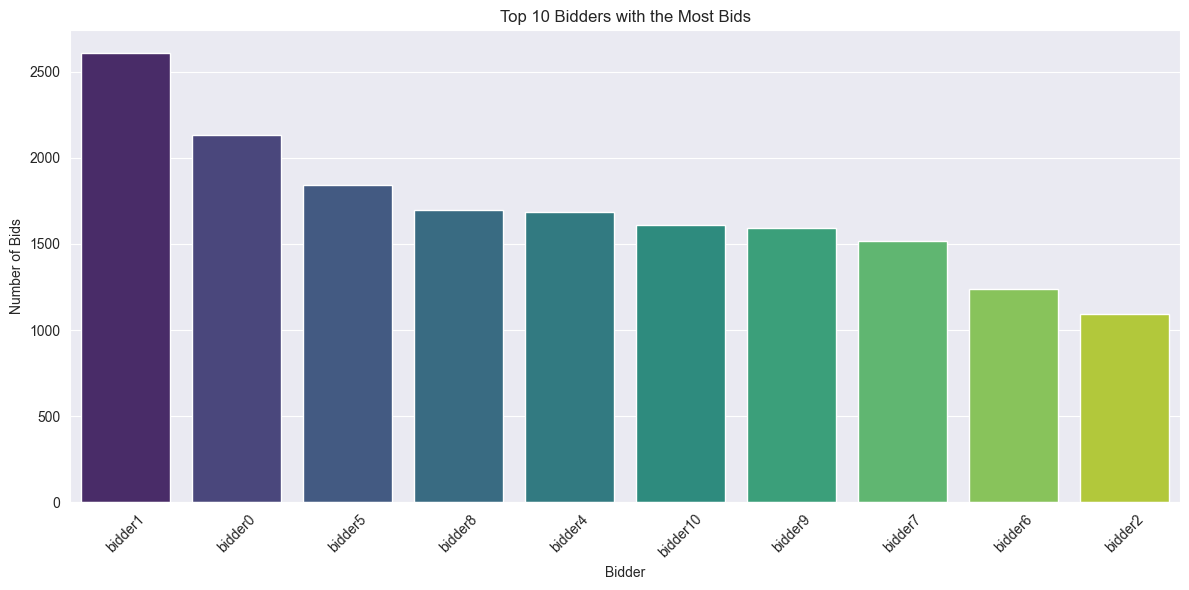

Bidder with the most bids: bidder1
Total number of bids: 2609


In [30]:
# Count the number of bids for each bidder
bidder_counts = df['bidder'].value_counts().reset_index()
bidder_counts.columns = ['bidder', 'num_bids']

# Find the bidder with the most bids
top_bidder = bidder_counts.loc[bidder_counts['num_bids'].idxmax()]

# Plot the bidders with the most bids
plt.figure(figsize=(12, 6))
sns.barplot(x='bidder', y='num_bids', data=bidder_counts.head(10), palette='viridis')
plt.xlabel('Bidder')
plt.ylabel('Number of Bids')
plt.title('Top 10 Bidders with the Most Bids')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Bidder with the most bids:", top_bidder['bidder'])
print("Total number of bids:", top_bidder['num_bids'])


Based on the analysis of the dataset, it's evident that bidder1 emerges as the top bidder with the most bids, followed closely by bidder0 and bidder5. Specifically, bidder1 has submitted a substantial number of bids, totaling 2609 bids, indicating a significant presence in the auction marketplace. This data underscores the active engagement of these top bidders in the bidding process, highlighting their competitiveness and influence within the advertising ecosyste

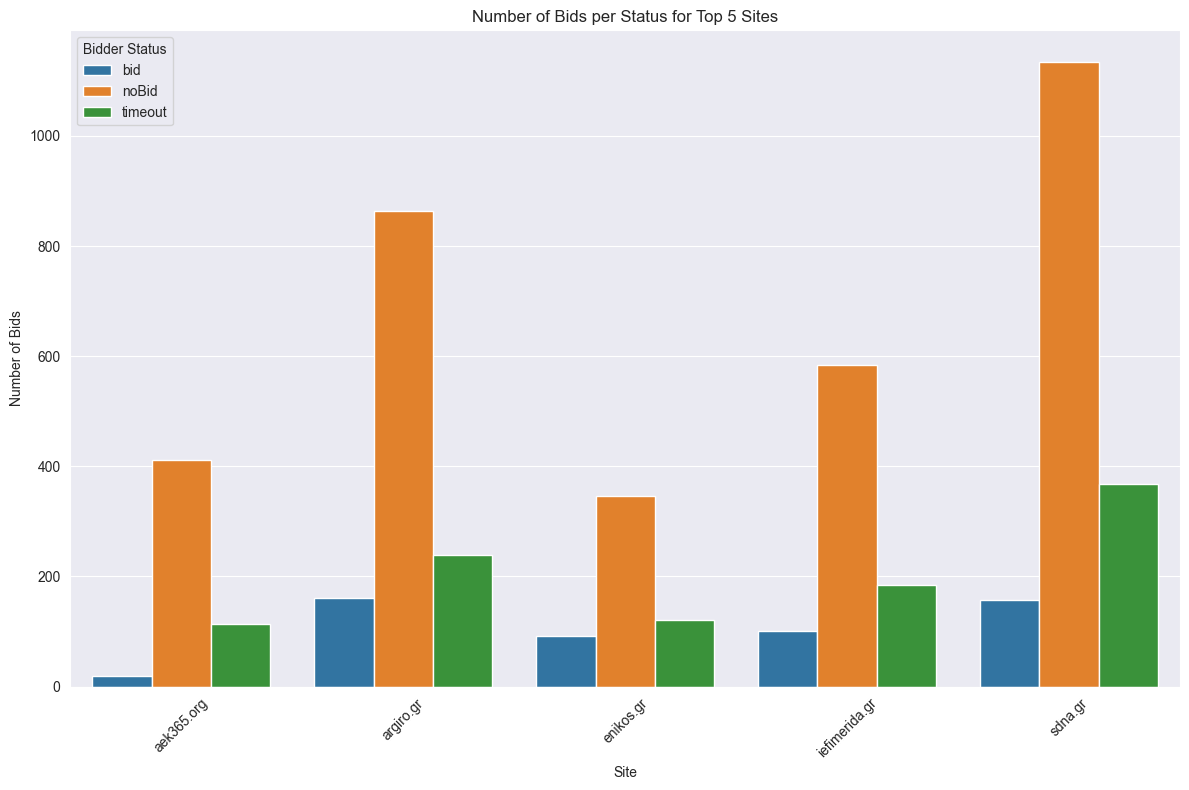

In [40]:
# Limit the number of sites to display
top_n_sites = 5
top_sites = df['domain'].value_counts().head(top_n_sites).index

# Filter data for top N sites
filtered_data = df[df['domain'].isin(top_sites)]

# Group the filtered data by 'domain' and 'bidder_status', then count the number of bids
bids_per_status_per_site = filtered_data.groupby(['domain', 'bidder_status']).size().reset_index(name='num_bids')

# Plotting
plt.figure(figsize=(12, 8))

sns.barplot(x='domain', y='num_bids', hue='bidder_status', data=bids_per_status_per_site)
plt.xlabel('Site')
plt.ylabel('Number of Bids')
plt.title('Number of Bids per Status for Top {} Sites'.format(top_n_sites))
plt.legend(title='Bidder Status')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

From this data, we can observe the distribution of bid statuses (bid, noBid, timeout) for each site. It appears that "aek365.org" has the lowest number of bids among the sites, while "sdna.gr" has the highest number of noBids. Additionally, "argiro.gr" and "enikos.gr" exhibit significant numbers of noBids. These findings shed light on the bidding behavior across different sites, highlighting variations in bidding activity and engagement levels. 

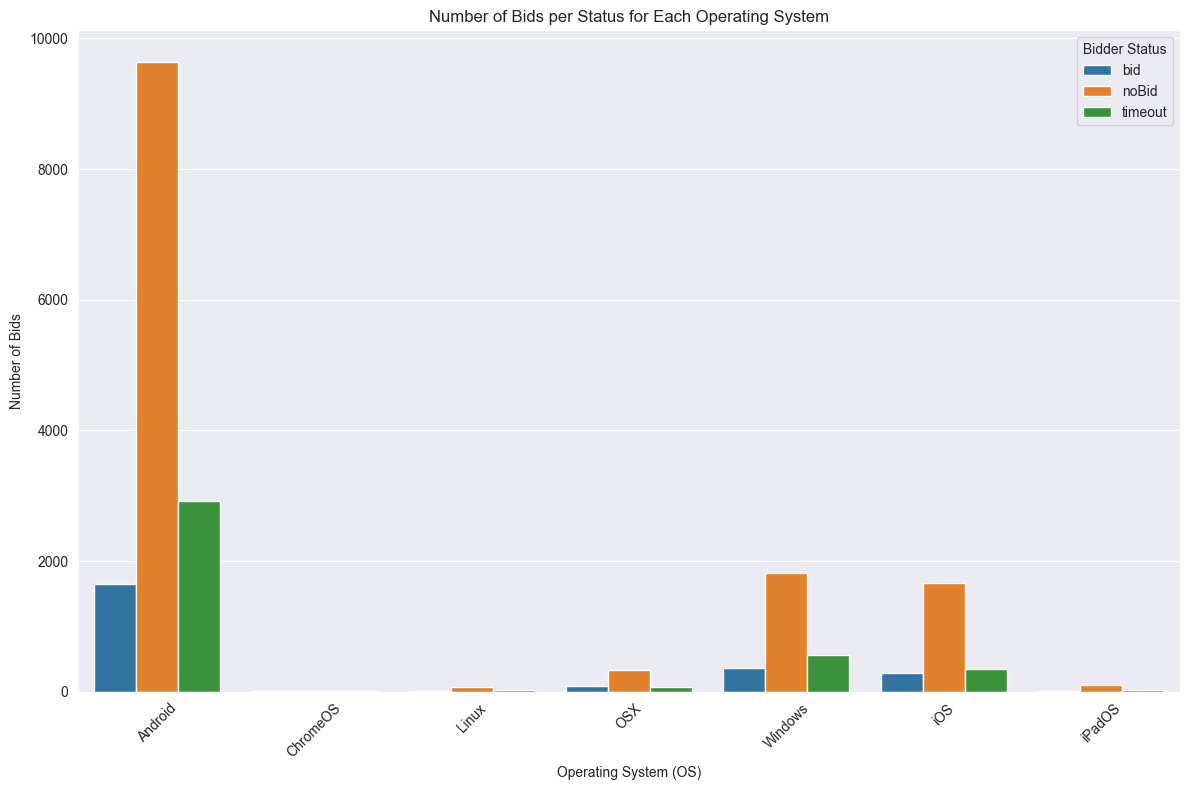

In [41]:
# Group the data by 'os' and 'bidder_status', then count the number of bids
bids_per_status_per_os = df.groupby(['os', 'bidder_status']).size().reset_index(name='num_bids')

# Plotting
plt.figure(figsize=(12, 8))

sns.barplot(x='os', y='num_bids', hue='bidder_status', data=bids_per_status_per_os)
plt.xlabel('Operating System (OS)')
plt.ylabel('Number of Bids')
plt.title('Number of Bids per Status for Each Operating System')
plt.legend(title='Bidder Status')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

From the data, we can observe the distribution of bid statuses (bid, noBid, timeout) across different operating systems. Notably, the "Android" operating system exhibits the highest number of timeouts compared to other OSs, with a total of 2916 timeouts recorded. This suggests potential issues or challenges specific to the Android environment that may hinder the timely submission of bids during the bidding process.